In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import re
import numpy as np
import pandas as pd

from glob import glob

from dogFunctions import *
from imageTrans import plotGrid

from model import *

Using TensorFlow backend.


In [2]:
testFiles  = np.array( glob('./test/*.jpg') )
trainFiles = np.array( glob('./trainCrop/*.jpg') )

breeds = readBreeds()
labels = pd.read_csv("labels.csv")

labels['breed'] = pd.Categorical( labels['breed'], categories = breeds )
labels['breed'] = labels['breed'].cat.codes

In [3]:
#make sure there are an equal proportion of each breed in validation set.

valFiles = sampleDogs( trainFiles, labels, 0.147 )
valFiles = np.array( list(set(valFiles)) )


tmp = []

for f in trainFiles:
    if ( not (f in valFiles) ):
        tmp.append(f)

trainFiles = np.array( tmp )
np.random.shuffle(trainFiles)

print( "Validation set:", len(valFiles) )
print( "Training set:", len(trainFiles) )

loadState = False

Validation set: 1444
Training set: 8779


In [4]:
with open( "valFiles.txt", "w") as valOut:
    for f in valFiles:
        valOut.write( f + "\n" )

with open( "trainFiles.txt", "w") as trainOut:
    for f in trainFiles:
        trainOut.write( f + "\n" )

In [3]:
valFiles   = readSavedFiles( "valFiles.txt" )
trainFiles = readSavedFiles( "trainFiles.txt" )

loadState = True

In [4]:
params = { "batchSize" : 16, "params" : {  "alpha"    : 0.001, #batchSize = 1024
                                           "b1"       : 0.9,
                                           "b2"       : 0.999,
                                           "eps"      : 0.1,
                                           "dropProb" : 0.3,
                                           "bnm"      : 0.99 } }

loVal, tls, vls, tas, vas = trainModel( trainFiles, valFiles, labels, params, True, loadState )

INFO:tensorflow:Restoring parameters from ./best/dogClass-best.ckpt
Step 25:
   valLoss: 3.544631, trainLoss: 2.510048, trAcc: 0.3750, valAcc: 0.2022, patience:  0
Step 50:
   valLoss: 3.322770, trainLoss: 3.064462, trAcc: 0.2500, valAcc: 0.2361, patience:  0
Step 75:
   valLoss: 3.187941, trainLoss: 1.659096, trAcc: 0.4375, valAcc: 0.2389, patience:  0
Step 100:
   valLoss: 3.467468, trainLoss: 3.510148, trAcc: 0.1250, valAcc: 0.2036, patience:  0
Step 125:
   valLoss: 3.232800, trainLoss: 3.295146, trAcc: 0.2500, valAcc: 0.2341, patience:  0
Step 150:
   valLoss: 3.511436, trainLoss: 4.149984, trAcc: 0.1250, valAcc: 0.2043, patience:  0
Step 175:
   valLoss: 3.069346, trainLoss: 3.083217, trAcc: 0.0625, valAcc: 0.2722, patience:  0
Step 200:
   valLoss: 3.059555, trainLoss: 2.830664, trAcc: 0.2500, valAcc: 0.2486, patience:  0
Step 225:
   valLoss: 2.987501, trainLoss: 2.690742, trAcc: 0.3125, valAcc: 0.2548, patience:  0
Step 250:
   valLoss: 3.774276, trainLoss: 3.020285, trAcc: 0.

Step 2100:
   valLoss: 2.589226, trainLoss: 1.537244, trAcc: 0.6016, valAcc: 0.3393, patience:  4
Step 2125:
   valLoss: 2.609154, trainLoss: 1.177586, trAcc: 0.7266, valAcc: 0.3428, patience:  0
Step 2150:
   valLoss: 2.599747, trainLoss: 1.596339, trAcc: 0.5312, valAcc: 0.3428, patience:  1
Step 2175:
   valLoss: 2.594566, trainLoss: 1.315591, trAcc: 0.6641, valAcc: 0.3435, patience:  2
Step 2200:
   valLoss: 2.635067, trainLoss: 1.393243, trAcc: 0.6797, valAcc: 0.3366, patience:  3
Step 2225:
   valLoss: 2.656968, trainLoss: 1.838662, trAcc: 0.5234, valAcc: 0.3352, patience:  4
Step 2250:
   valLoss: 2.614058, trainLoss: 1.168682, trAcc: 0.6953, valAcc: 0.3373, patience:  5
Step 2275:
   valLoss: 2.620791, trainLoss: 1.331517, trAcc: 0.6328, valAcc: 0.3386, patience:  6
Step 2300:
   valLoss: 2.618767, trainLoss: 1.573600, trAcc: 0.5625, valAcc: 0.3442, patience:  7
Step 2325:
   valLoss: 2.623210, trainLoss: 1.484190, trAcc: 0.5625, valAcc: 0.3324, patience:  8
Step 2350:
   valLos

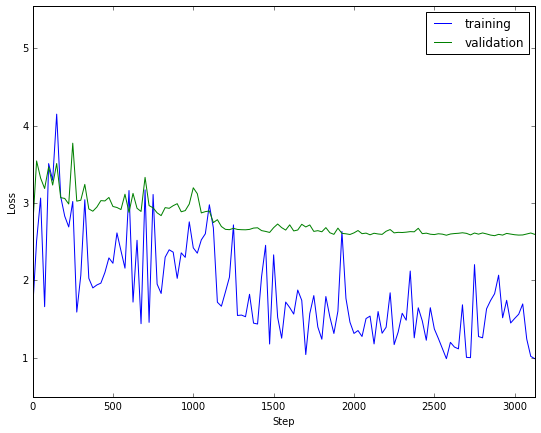

In [5]:
fig = plt.figure( 1, (9, 7) )

n = len(tls)

plt.plot( list( range(0, n * 25, 25) ), tls, label = "training" )
plt.plot( list( range(0, n * 25, 25) ), vls, label = "validation" )

plt.xlim( xmin = 0, xmax = (len(tls) - 1)*25 )
plt.ylim( ymax = np.max(vls[1:]) + .5 * max(tls[1], vls[1]),
          ymin = min( np.min(tls[1:]), np.min(vls[1:]) )
               - .5 * min( np.min(tls), np.min(vls) ) )

plt.xlabel("Step")
plt.ylabel("Loss")

plt.legend( loc = "best" )

fig.savefig( "loss.eps", format = 'eps', dpi = 20000, bbox_inches = 'tight' )

plt.show()

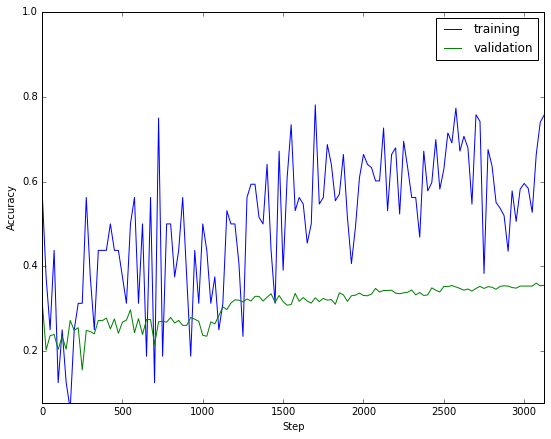

In [6]:
fig = plt.figure( 2, (9, 7) )

n = len(vas)

plt.plot( list( range(0, n * 25, 25) ), tas, label = "training" )
plt.plot( list( range(0, n * 25, 25) ), vas, label = "validation" )

plt.xlim( xmin = 0, xmax = (len(vas) - 1)*25 )
plt.ylim( ymax = 1,
          ymin = max( np.min(vas) - .5 * np.min(vas), 0) )

plt.xlabel("Step")
plt.ylabel("Accuracy")

plt.legend( loc = "best" )

fig.savefig( "acc.eps", format = 'eps', dpi = 20000, bbox_inches = 'tight' )

plt.show()

In [2]:
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile

from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image

# This is needed since the notebook is stored in the object_detection folder.
sys.path.append("..")
from object_detection.utils import ops as utils_ops

if tf.__version__ < '1.4.0':
  raise ImportError('Please upgrade your tensorflow installation to v1.4.* or later!')


In [3]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [4]:
from utils import label_map_util

from utils import visualization_utils as vis_util

/usr/lib/python3/dist-packages/matplotlib/__init__.py:1352: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [5]:
# What model to download.
MODEL_NAME = 'ssd_mobilenet_v1_coco_2017_11_17'
MODEL_FILE = MODEL_NAME + '.tar.gz'
DOWNLOAD_BASE = 'http://download.tensorflow.org/models/object_detection/'

# Path to frozen detection graph. This is the actual model that is used for the object detection.
PATH_TO_CKPT = MODEL_NAME + '/frozen_inference_graph.pb'

# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = os.path.join('data', 'mscoco_label_map.pbtxt')

NUM_CLASSES = 90

In [6]:
opener = urllib.request.URLopener()
opener.retrieve(DOWNLOAD_BASE + MODEL_FILE, MODEL_FILE)
tar_file = tarfile.open(MODEL_FILE)
for file in tar_file.getmembers():
  file_name = os.path.basename(file.name)
  if 'frozen_inference_graph.pb' in file_name:
    tar_file.extract(file, os.getcwd())

In [7]:
opener = urllib.request.URLopener()
opener.retrieve(DOWNLOAD_BASE + MODEL_FILE, MODEL_FILE)
tar_file = tarfile.open(MODEL_FILE)
for file in tar_file.getmembers():
  file_name = os.path.basename(file.name)
  if 'frozen_inference_graph.pb' in file_name:
    tar_file.extract(file, os.getcwd())

In [8]:
detection_graph = tf.Graph()
with detection_graph.as_default():
  od_graph_def = tf.GraphDef()
  with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
    serialized_graph = fid.read()
    od_graph_def.ParseFromString(serialized_graph)
    tf.import_graph_def(od_graph_def, name='')

In [9]:
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)

In [10]:
def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

In [11]:
# For the sake of simplicity we will use only 2 images:
# image1.jpg
# image2.jpg
# If you want to test the code with your images, just add path to the images to the TEST_IMAGE_PATHS.
#PATH_TO_TEST_IMAGES_DIR = 'test_images'
PATH_TO_TEST_IMAGES_DIR = '/home/baxter/Desktop/MLbook/testImages'
TEST_IMAGE_PATHS = [ os.path.join(PATH_TO_TEST_IMAGES_DIR, 'image{}.jpg'.format(i)) for i in range(1, 3) ]

# Size, in inches, of the output images.
IMAGE_SIZE = (12, 8)

In [12]:
def run_inference_for_single_image(image, graph):
  with graph.as_default():
    with tf.Session() as sess:
      # Get handles to input and output tensors
      ops = tf.get_default_graph().get_operations()
      all_tensor_names = {output.name for op in ops for output in op.outputs}
      tensor_dict = {}
      for key in [
          'num_detections', 'detection_boxes', 'detection_scores',
          'detection_classes', 'detection_masks'
      ]:
        tensor_name = key + ':0'
        if tensor_name in all_tensor_names:
          tensor_dict[key] = tf.get_default_graph().get_tensor_by_name(
              tensor_name)
      if 'detection_masks' in tensor_dict:
        # The following processing is only for single image
        detection_boxes = tf.squeeze(tensor_dict['detection_boxes'], [0])
        detection_masks = tf.squeeze(tensor_dict['detection_masks'], [0])
        # Reframe is required to translate mask from box coordinates to image coordinates and fit the image size.
        real_num_detection = tf.cast(tensor_dict['num_detections'][0], tf.int32)
        detection_boxes = tf.slice(detection_boxes, [0, 0], [real_num_detection, -1])
        detection_masks = tf.slice(detection_masks, [0, 0, 0], [real_num_detection, -1, -1])
        detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
            detection_masks, detection_boxes, image.shape[0], image.shape[1])
        detection_masks_reframed = tf.cast(
            tf.greater(detection_masks_reframed, 0.5), tf.uint8)
        # Follow the convention by adding back the batch dimension
        tensor_dict['detection_masks'] = tf.expand_dims(
            detection_masks_reframed, 0)
      image_tensor = tf.get_default_graph().get_tensor_by_name('image_tensor:0')

      # Run inference
      output_dict = sess.run(tensor_dict,
                             feed_dict={image_tensor: np.expand_dims(image, 0)})

      # all outputs are float32 numpy arrays, so convert types as appropriate
      output_dict['num_detections'] = int(output_dict['num_detections'][0])
      output_dict['detection_classes'] = output_dict[
          'detection_classes'][0].astype(np.uint8)
      output_dict['detection_boxes'] = output_dict['detection_boxes'][0]
      output_dict['detection_scores'] = output_dict['detection_scores'][0]
      if 'detection_masks' in output_dict:
        output_dict['detection_masks'] = output_dict['detection_masks'][0]
  return output_dict

In [13]:
def cropImage( image, boundingBox, savePath ):
    
    graph = tf.Graph()
    
    height, width, channel = image.shape

    with graph.as_default():

        img  = tf.placeholder( tf.float64, shape = (height, width, channel), name = "image" )
        box  = tf.placeholder( tf.float32, shape = (4,), name = "box" )
        path = tf.placeholder( tf.string, name = "string" )

        h, w, c = img.get_shape().as_list()
        ymin, xmin, ymax, xmax = tf.unstack(box)

        cropped = tf.image.crop_to_bounding_box( img, tf.cast(h * ymin, tf.int64),
                                                      tf.cast(w * xmin, tf.int64),
                                                      tf.cast(h * (ymax - ymin), tf.int64),
                                                      tf.cast(w * (xmax - xmin), tf.int64) )
        encoded = tf.image.encode_jpeg( tf.cast(cropped, tf.uint8) )
        writeFile = tf.write_file( path, encoded )

        with tf.Session() as sess:
            result = sess.run( writeFile, feed_dict = { img : image, box : boundingBox, path : savePath }  )
            
        return result


In [15]:
from glob import glob

dogScores = []
#trainFiles = np.array( glob('./train/*.jpg') )
trainFiles = np.array( glob('./cats/*.jpg') )

with open( "scores.txt", 'w' ) as writeFile:

    for imagePath in trainFiles:
        image = Image.open(imagePath)

        imageNp = load_image_into_numpy_array(image)

        # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
        #image_np_expanded = np.expand_dims(imageNp, axis=0, dtype = int)

        # Actual detection.
        output_dict = run_inference_for_single_image(imageNp, detection_graph)

        if ( not 17 in output_dict['detection_classes'] ): #cat = 17, dog = 18
            #print("No dog in: " + image_path )
            writeFile.write( "No cat in: " + imagePath + "\n" )
            continue

        dogIndex = output_dict['detection_classes'].tolist().index(17)
        writeFile.write( "Dog score: {0:3.2f}   ".format(output_dict['detection_scores'][dogIndex]) + imagePath + "\n" )
        bBox = output_dict['detection_boxes'][dogIndex]

        fileId = getImageId( imagePath )

        cropImage( imageNp, bBox, "./catCroped/" + fileId + ".jpg" )


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4501f046d8>]],
      dtype=object)

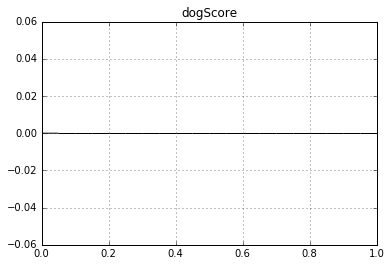

In [16]:
import pandas as pd

dogs = pd.DataFrame( data = { "dogScore" : dogScores } )
dogs.hist( bins = 20 )

In [ ]:
(dogs["dogScore"] < .6).sum()

In [ ]:
(dogs["dogScore"] < .5).sum()